In [2]:
# importing libraries
import pandas as pd                  # Preparing high-level data sets, etc.
import numpy as np                   # library for multi-dimensional array, matrix processing, etc.
import matplotlib.pyplot as plt      # Visualization Library
import seaborn as sns                # Visualization Library 
%matplotlib inline


### Objective of the Analysis Report
The main goal of this report is to give a clear and fair view of how candidates performed in the NEET UG 2024 exam across different regions and centers. By providing insights into the scores and distribution of candidates, the report aims to help people understand the performance trends and patterns in various states, cities, and centers. This can be useful for educators, policymakers, and students to get a better picture of the examination outcomes.

### Explanation of Columns in the DataFrame

#### dummy_srlno:
- This is a unique serial number assigned to each entry in the dataset. It serves as a way to identify each candidate's record uniquely and ensure the real information is distinguishable from public data. 

#### marks:
- These are the scores that candidates have obtained in the NEET UG 2024 examination.

#### state:
- This column indicates the state from which the candidate appeared for the exam. For instance, it tells whether the candidate took the exam from Maharashtra, Karnataka, Tamil Nadu, etc.

#### city:
- This shows the city where the examination center is located. So, it tells us if the candidate took the exam in cities like Mumbai, Bangalore, Chennai, etc.

#### center_name:
- This is the name of the specific examination center where the candidate sat for the exam.

#### center_number:
 - This is a unique identifier given to each examination center, much like a room number in a School. It helps in identifying the exact center where the candidate took the exam, ensuring there's no mix-up between different centers.



In [3]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\NEET DATA_ Analysis\\NEET_2024_RESULTS.csv")
df.head()
# Reading of Data Set from .csv file.

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [4]:
df.shape
# Shape of the DataFrame

(2333120, 6)

In [5]:
df.describe()
# Description of the the Data Set

,dummy_srlno,marks,center_number
count,2.333120e+06,2.333120e+06,2.333120e+06
mean,3.224024e+09,2.171572e+02,3.224023e+05
std,1.049597e+09,1.662403e+02,1.049597e+05
min,1.101010e+09,-1.800000e+02,1.101010e+05
25%,2.602020e+09,8.700000e+01,2.602020e+05
50%,3.111190e+09,1.630000e+02,3.111190e+05
75%,4.122060e+09,3.130000e+02,4.122060e+05
max,9.914010e+09,7.200000e+02,9.914010e+05


In [6]:
# General Information of the DataFrame/Data Sheet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333120 entries, 0 to 2333119
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   dummy_srlno    int64 
 1   marks          int64 
 2   state          object
 3   city           object
 4   center_name    object
 5   center_number  int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [7]:
# Checking data types in the DataFrame/Data Sheet
df.dtypes

dummy_srlno       int64
marks             int64
state            object
city             object
center_name      object
center_number     int64
dtype: object

In [8]:
df.isnull().sum()
# No null values in the Data Set

dummy_srlno      0
marks            0
state            0
city             0
center_name      0
center_number    0
dtype: int64

In [9]:
# Checking Missing Values
df.isna().any()

dummy_srlno      False
marks            False
state            False
city             False
center_name      False
center_number    False
dtype: bool

In [10]:
df.duplicated().sum()

## Tell duplicate values in the DataFrame

0

In [11]:
# Create a deep copy of the DataFrame
DF_copy = df.copy(deep=True)

DF_copy.head()

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [12]:
DF_copy.tail()

,dummy_srlno,marks,state,city,center_name,center_number
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333119,4613120139,91,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


In [13]:
DF_copy.drop(columns=["dummy_srlno"],inplace=True)

# Comment
## We are dropping the 'dummy_srlno' from the dataset because it contains approximately
### 2.3 million different values. Due to its high uniqueness, this column is likely not 
#### significant for our analysis.
DF_copy.head()

,marks,state,city,center_name,center_number
0,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [14]:
DF_copy.state.unique()
# Unique names in the column "state"

array(['ANDAMAN AND NICOBAR ISLANDS (UT)', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH(UT)',
       'CHHATTISGARH', 'DADRA AND NAGAR HAVELI (UT)',
       'DAMAN AND DIU (UT)', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LADAKH(UT)', 'LAKSHADWEEP (UT)', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ODISHA', 'OUTSIDE-INDIA', 'PUDUCHERRY(UT)', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH',
       'UTTARAKHAND', 'WEST BENGAL'], dtype=object)

In [15]:
DF_copy.state.unique().size
# Count of Unique names in the column "state"

38

In [16]:
DF_copy.center_name.unique().size
# Count of Unique names in the column "center_name"

4403

In [17]:
DF_copy.center_number.unique().size
# Count of Unique numbers in the column "center_number"

4750

In [18]:
state = DF_copy.groupby("state")
##  --> another SYNTAX for above syntax 
### state = DF_copy.groupby(DF_copy.state)

In [19]:
state.marks.describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
ANDAMAN AND NICOBAR ISLANDS (UT),1025.0,192.737561,126.354313,-5.0,103.0,155.0,263.00,680.0
ANDHRA PRADESH,63842.0,260.972385,174.312416,-89.0,110.0,224.0,393.00,720.0
ARUNACHAL PRADESH,4774.0,162.896942,116.649557,-16.0,79.0,129.0,218.00,705.0
ASSAM,44272.0,190.940459,154.371341,-102.0,76.0,137.0,268.00,715.0
BIHAR,136191.0,188.583585,158.670862,-180.0,71.0,133.0,263.00,720.0
CHANDIGARH(UT),3530.0,304.816714,178.131070,0.0,155.0,270.0,437.00,715.0
CHHATTISGARH,44241.0,185.636084,145.139822,-44.0,75.0,137.0,265.00,711.0
DADRA AND NAGAR HAVELI (UT),1207.0,221.932063,150.286273,-10.0,105.0,183.0,312.50,692.0
DAMAN AND DIU (UT),769.0,180.239272,117.562217,-4.0,96.0,150.0,240.00,665.0


In [20]:
state.size()
## Row count per state.

state
ANDAMAN AND NICOBAR ISLANDS (UT)      1025
ANDHRA PRADESH                       63842
ARUNACHAL PRADESH                     4774
ASSAM                                44272
BIHAR                               136191
CHANDIGARH(UT)                        3530
CHHATTISGARH                         44241
DADRA AND NAGAR HAVELI (UT)           1207
DAMAN AND DIU (UT)                     769
DELHI                                66090
GOA                                   4930
GUJARAT                              86952
HARYANA                              54861
HIMACHAL PRADESH                     19062
JAMMU AND KASHMIR                    47551
JHARKHAND                            34401
KARNATAKA                           150894
KERALA                              138545
LADAKH(UT)                             715
LAKSHADWEEP (UT)                       167
MADHYA PRADESH                      130238
MAHARASHTRA                         275245
MANIPUR                               8946
MEGHA

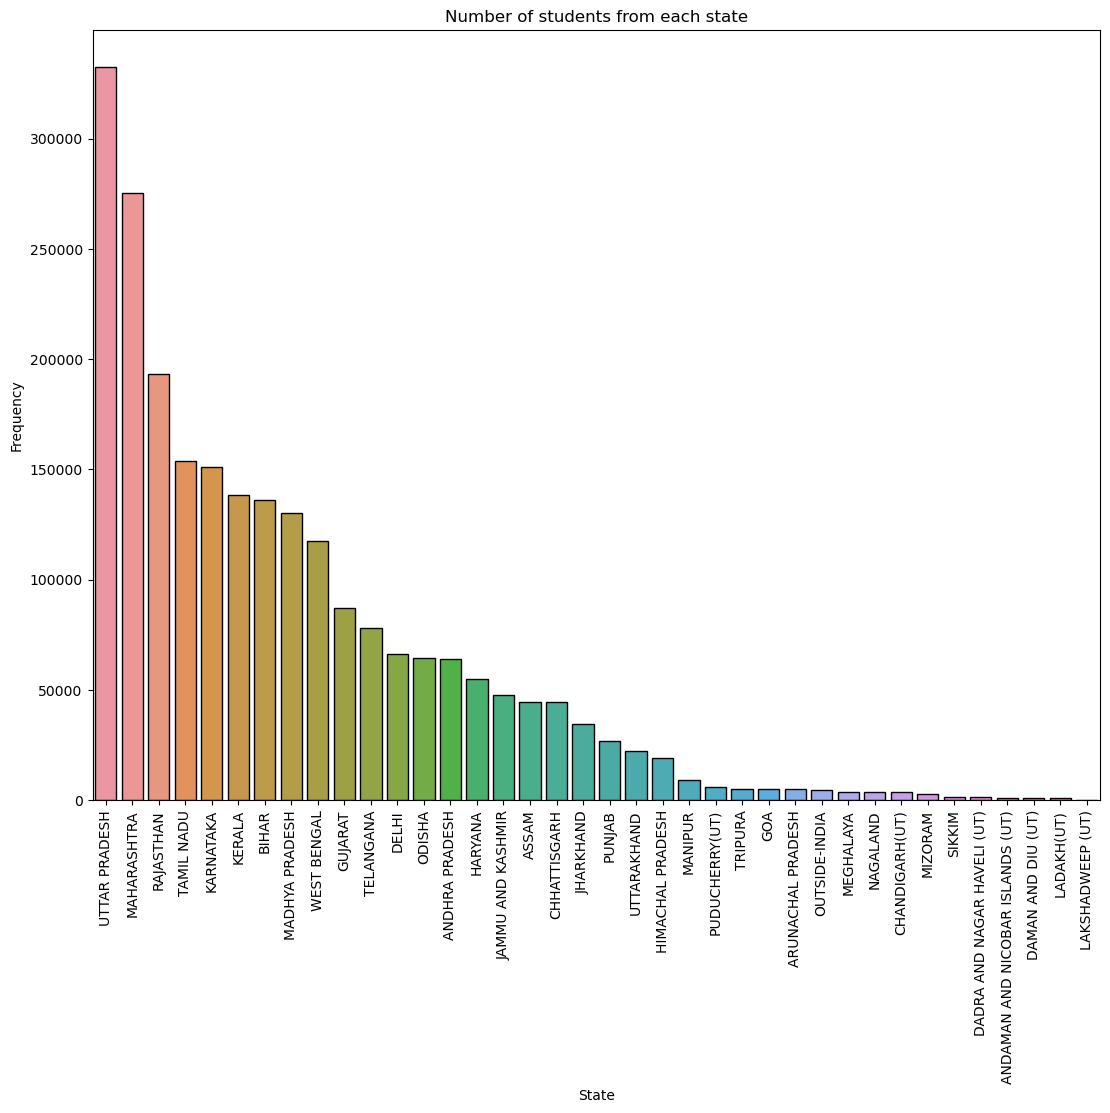

In [21]:
# Calculate frequency of each state
state_counts = DF_copy['state'].value_counts()

# Create the figure with specified size
plt.figure(figsize=(13, 10))  # Adjust width and height as needed

# Create the bar graph
## plt.bar(state_counts.index, state_counts.values)

# Create the bar plot using Seaborn
sns.barplot(x=state_counts.index, y=state_counts.values, edgecolor = 'black', linewidth = 1)
## sns.barplot(x=state_counts.index, y=state_counts.values, edgecolor = 'black', 
##    palette='viridis', linewidth = 1)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Number of students from each state')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

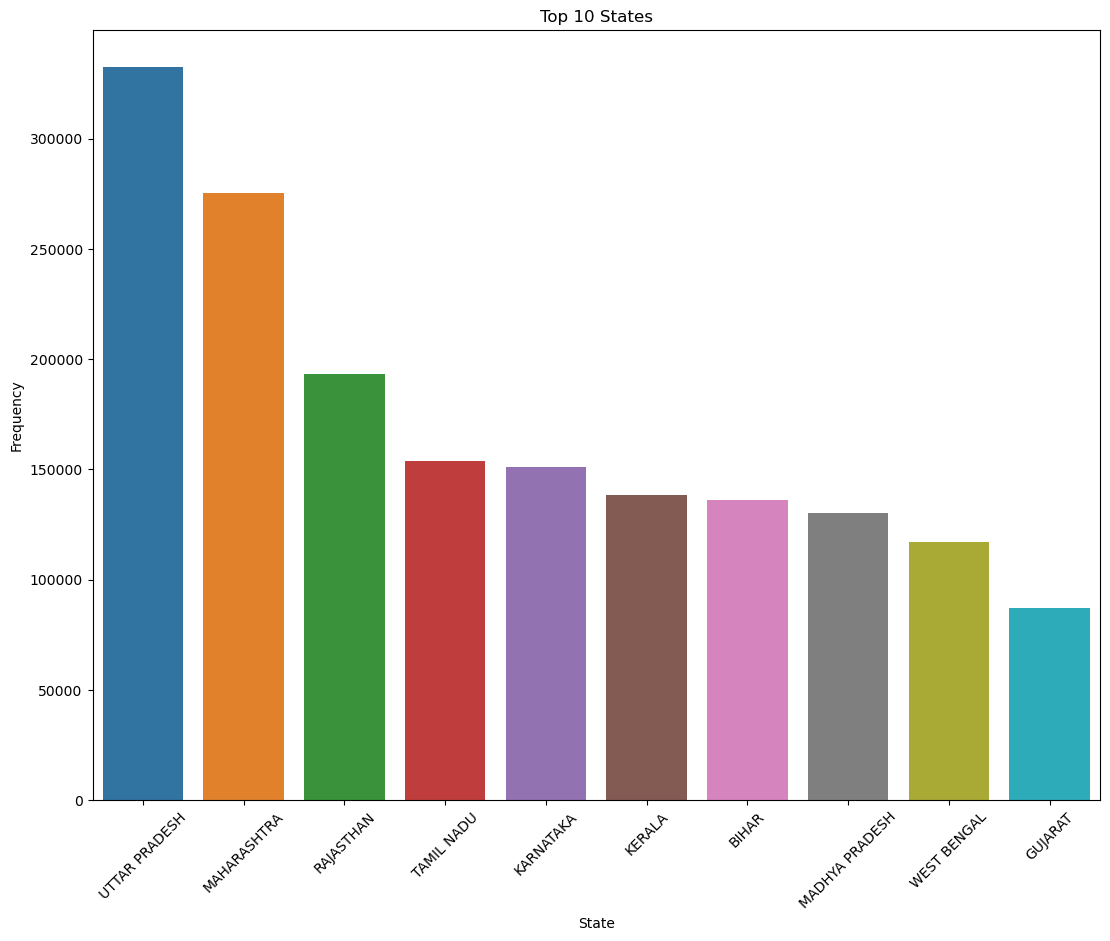

In [22]:
# Calculate frequency of each state
state_counts = DF_copy['state'].value_counts()

# Create the figure with specified size
plt.figure(figsize=(13, 10))  # Adjust width and height as needed

# Select top 10 states
top_10_states = state_counts.head(10)

# Create the bar plot using Seaborn
sns.barplot(x=top_10_states.index, y=top_10_states.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Top 10 States')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


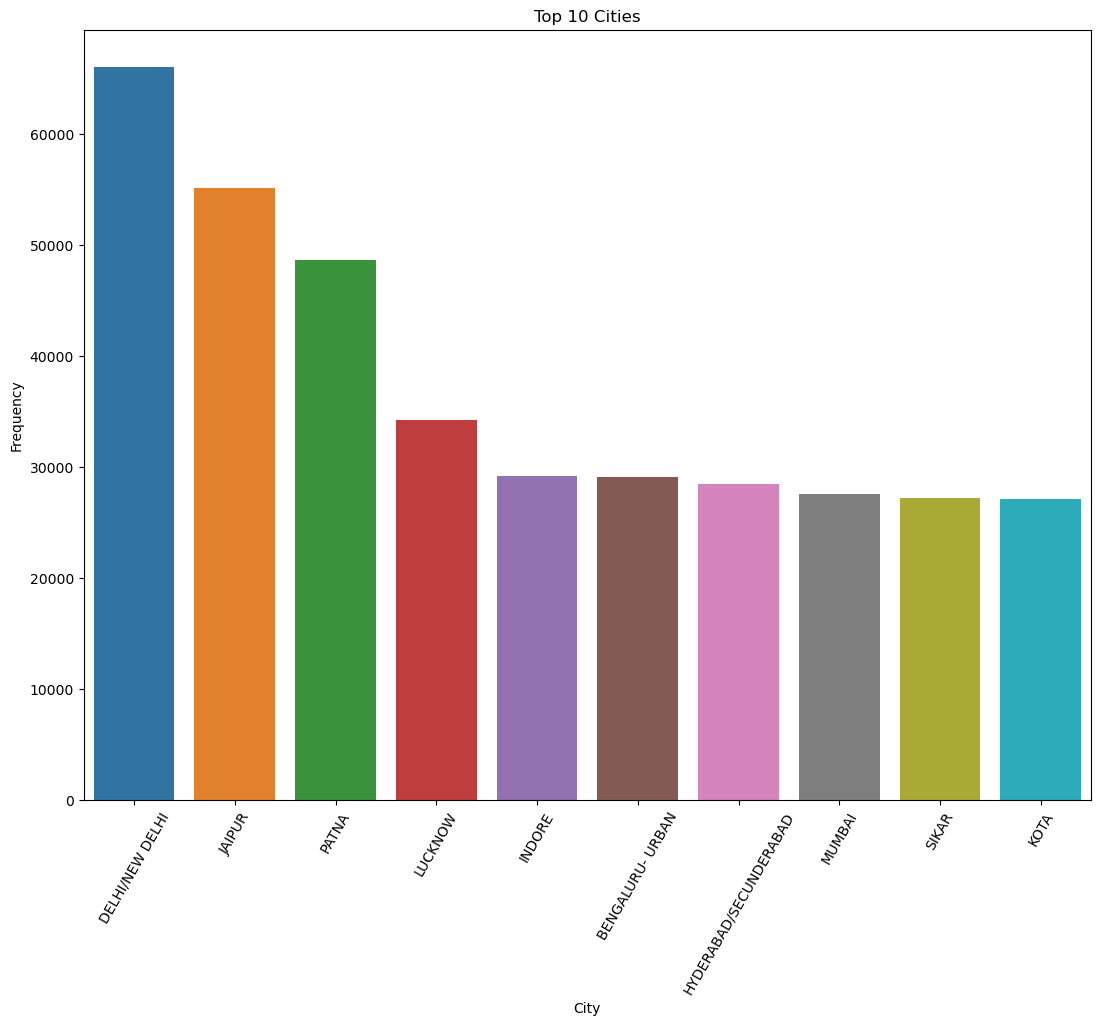

In [23]:
# Calculate frequency of each city
city_counts = DF_copy['city'].value_counts()

# Create the figure with specified size
plt.figure(figsize=(13, 10))  # Adjust width and height as needed

# Select top 10 cities
top_10_cities = city_counts.head(10)

# Create the bar plot using Seaborn
sns.barplot(x=top_10_cities.index, y=top_10_cities.values)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Top 10 Cities')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [ ]:
DF_copy.city.unique()
### Unique names in the column "city"

DF_copy.city.unique().size

### Count of Unique names in the column "city"


In [25]:
DF_copy.city.nunique()
# Count of Unique names in the column "city"

567

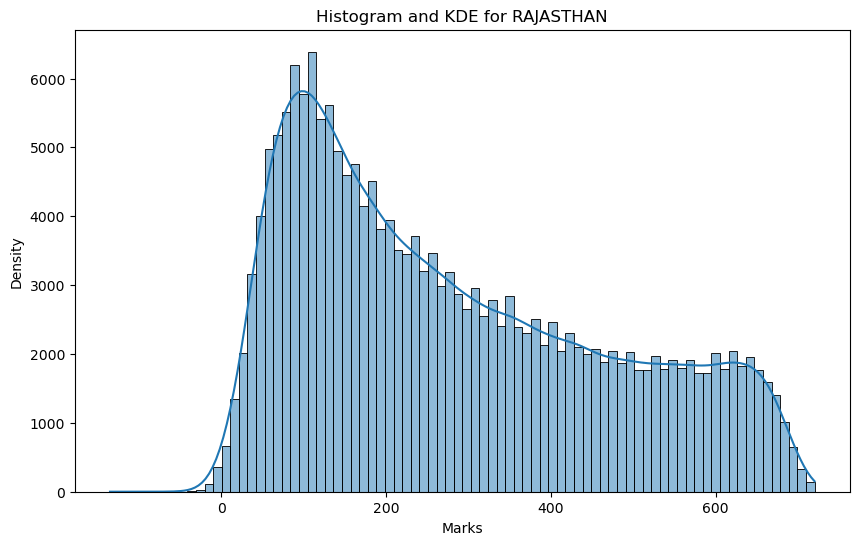

In [78]:
def plot_histogram_kde(state_name, df):
    state_data = df[df["state"] == state_name]
    
    if state_data.empty:
        print(f"No data available for the city: {state_name}")
        return
    
    plt.figure(figsize=(10, 6))
    sns.histplot(state_data["marks"], kde=True)
    plt.title(f"Histogram and KDE for {state_name}")
    plt.xlabel("Marks")
    plt.ylabel("Density")
    plt.show()

# Example usage
plot_histogram_kde("RAJASTHAN", DF_copy)

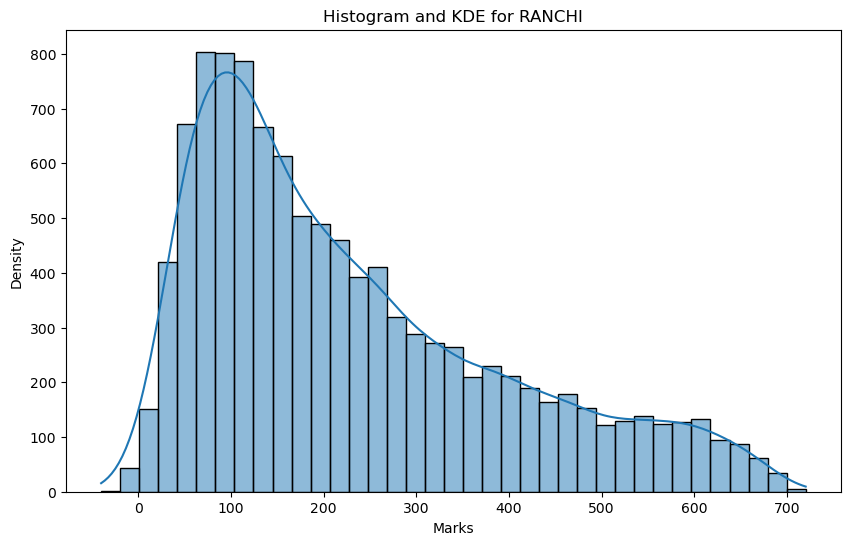

In [79]:
def plot_histogram_kde(city_name, df):
    city_data = df[df["city"] == city_name]
    
    if city_data.empty:
        print(f"No data available for the city: {city_name}")
        return
    
    plt.figure(figsize=(10, 6))
    sns.histplot(city_data["marks"], kde=True)
    plt.title(f"Histogram and KDE for {city_name}")
    plt.xlabel("Marks")
    plt.ylabel("Density")
    plt.show()

# Example usage
plot_histogram_kde("RANCHI", DF_copy)

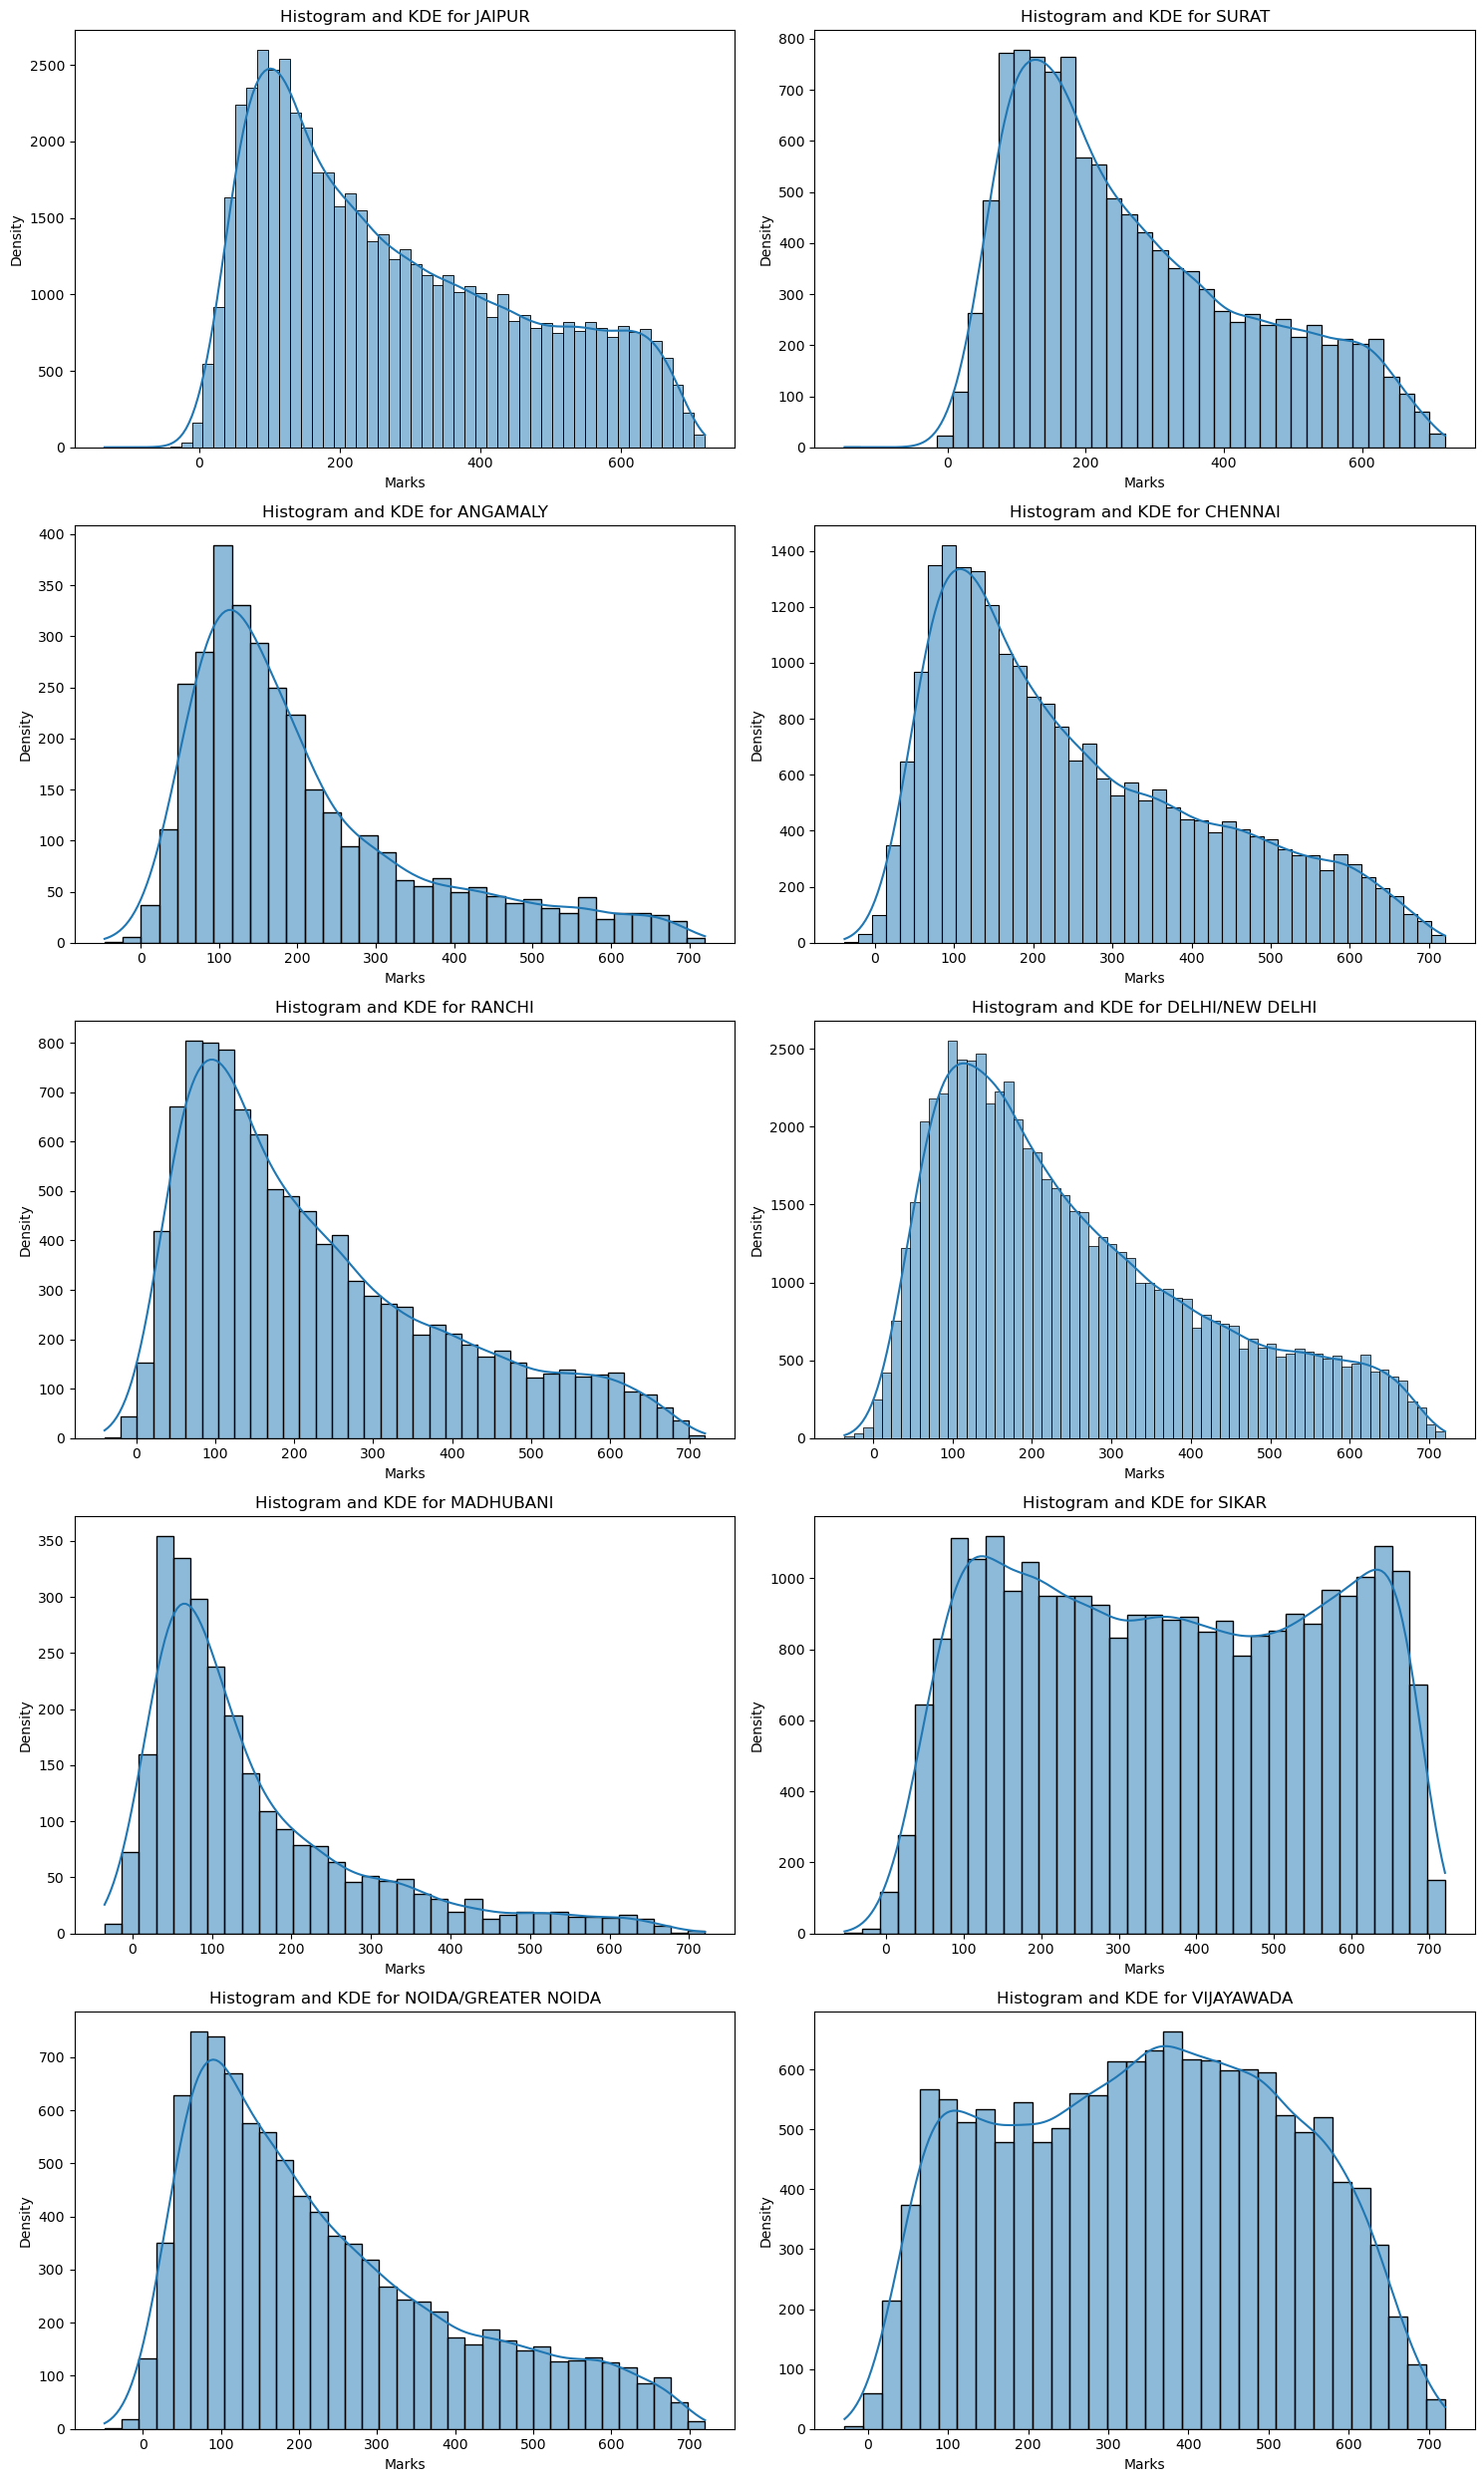

In [80]:
def plot_histogram_kde_multiple(cities, df):
    n = len(cities)
    
    if n > 10:
        print("Please enter up to 10 cities.")
        return
    
    cols = 2  # Two columns for subplots
    rows = (n + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i, city_name in enumerate(cities):
        city_data = df[df["city"] == city_name]
        
        if city_data.empty:
            print(f"No data available for the city: {city_name}")
            continue
        
        sns.histplot(city_data["marks"], kde=True, ax=axes[i])
        axes[i].set_title(f"Histogram and KDE for {city_name}")
        axes[i].set_xlabel("Marks")
        axes[i].set_ylabel("Density")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
cities_to_compare = ["JAIPUR", "SURAT", "ANGAMALY", "CHENNAI", "RANCHI", "DELHI/NEW DELHI", 
                     "MADHUBANI", "SIKAR", "NOIDA/GREATER NOIDA", "VIJAYAWADA"]
plot_histogram_kde_multiple(cities_to_compare, DF_copy)


In [66]:
import plotly.express as px


# Filter for students with perfect scores (720 Marks)
perfect_scores = DF_copy[DF_copy["marks"] == 720]

# Count the number of students with 720 marks for each state and center_number
statewise_perfect_score = perfect_scores.groupby(["state", "center_number"]).size().reset_index(name="Number of Perfect Scores")

# Calculate the total number of perfect scores
total_perfect_scores = statewise_perfect_score["Number of Perfect Scores"].sum()

# Print the result
print(statewise_perfect_score)
print(statewise_perfect_score.count())
print(total_perfect_scores)

# Plot the results using Plotly
fig = px.bar(statewise_perfect_score, x='state', y='Number of Perfect Scores', 
             color='center_number', 
             title='Number of Perfect Scores (720 Marks) by State and Center',
             labels={'state': 'State', 'Number of Perfect Scores': 'Number of Perfect Scores'},
             barmode='group', 
             color_continuous_scale=px.colors.qualitative.Pastel)

# Show the plot
fig.show()


             state  center_number  Number of Perfect Scores
0   ANDHRA PRADESH         120304                         1
1   ANDHRA PRADESH         120501                         1
2   ANDHRA PRADESH         120503                         1
3   ANDHRA PRADESH         120504                         1
4            BIHAR         150245                         1
5            BIHAR         150402                         1
6            BIHAR         151807                         1
7            BIHAR         153105                         1
8            DELHI         200192                         1
9          GUJARAT         220106                         2
10         GUJARAT         220701                         1
11         GUJARAT         220804                         1
12       JHARKHAND         260313                         1
13       KARNATAKA         270715                         1
14       KARNATAKA         271215                         1
15       KARNATAKA         271216       

In [27]:
DF_copy.sample(200000).head()

# Randomly select samples from DataFrame 

,marks,state,city,center_name,center_number
2142058,70,UTTAR PRADESH,KANPUR,DELHI PUBLIC SCHOOL BARRA KANPUR UP,440718
1585924,151,RAJASTHAN,JODHPUR,ST JOHN''S SCHOOL,390421
2105546,33,UTTAR PRADESH,JAUNPUR,SS PUBLIC SCHOOL,444110
590597,285,JHARKHAND,SAHIBGANJ,RAJASTHAN INTER SCHOOL SAHIBGANJ,262101
429099,326,GUJARAT,SURAT,SHREEVASISHTHAVIDHYALAYA,220806


In [28]:
DF_copy.state.sample(20000).head()

# Randomly select samples from column "state" of DataFrame 

2093590     UTTAR PRADESH
967160     MADHYA PRADESH
1561545         RAJASTHAN
2148979     UTTAR PRADESH
835754             KERALA
Name: state, dtype: object

In [29]:
DF_copy.state.sample(10)

# Random sample from column "state"

1706318        TAMIL NADU
41634      ANDHRA PRADESH
1821267         TELANGANA
1952807     UTTAR PRADESH
1985938     UTTAR PRADESH
1959226     UTTAR PRADESH
324904              DELHI
10162      ANDHRA PRADESH
145344              BIHAR
275081       CHHATTISGARH
Name: state, dtype: object

<font size = 5.5> **Code for plotly.express as px**

In [ ]:
# Group by state and count the number of students in each state
state_counts = DF_copy['state'].value_counts()

# Get the top 10 states
top_ten_states = state_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 states
filtered_df = DF_copy[DF_copy['state'].isin(top_ten_states)]

# Plot the box plot using Plotly
fig = px.box(filtered_df, x='state', y='marks', title='Box Plot of Marks for Top Ten States')

# Customize the layout
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Marks',
    xaxis_tickangle=-75
)

# Show the plot
fig.show()


<Figure size 1200x800 with 0 Axes>

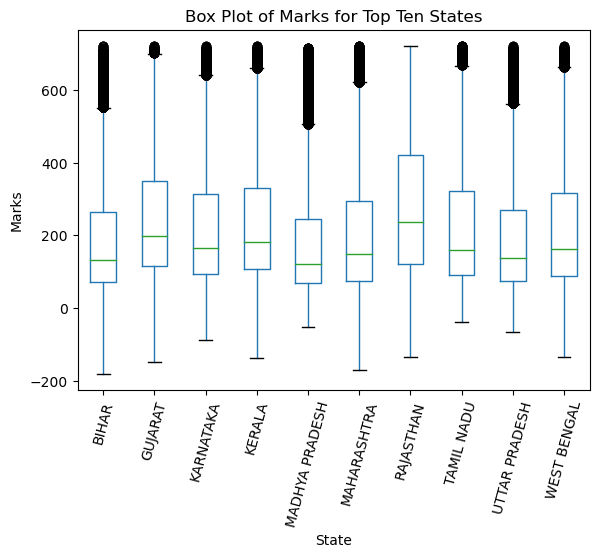

In [74]:
# Group by state and count the number of students in each state
state_counts = DF_copy['state'].value_counts()

# Get the top 10 states
top_ten_states = state_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 states
filtered_df = DF_copy[DF_copy['state'].isin(top_ten_states)]

# Plot the box plot
plt.figure(figsize=(12, 8))
filtered_df.boxplot(column='marks', by='state', grid=False)
plt.title('Box Plot of Marks for Top Ten States')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('State')
plt.ylabel('Marks')
plt.xticks(rotation=75)
plt.show()


<Figure size 1200x800 with 0 Axes>

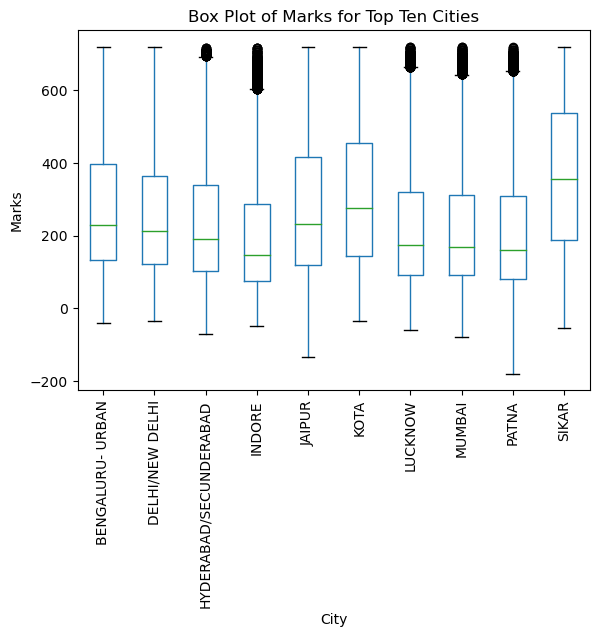

In [73]:
# Group by city and count the number of students in each state
city_counts = DF_copy['city'].value_counts()

# Get the top 10 cities
top_ten_cities = city_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 states
filtered_df = DF_copy[DF_copy['city'].isin(top_ten_cities)]

# Plot the box plot
plt.figure(figsize=(12, 8))
filtered_df.boxplot(column='marks', by='city', grid=False)
plt.title('Box Plot of Marks for Top Ten Cities')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('City')
plt.ylabel('Marks')
plt.xticks(rotation=90)
plt.show()


In [77]:
DF_copy.city.nunique(), DF_copy.center_name.nunique(),DF_copy.center_number.nunique()

(567, 4403, 4750)

<font size = 5.5> **State wise Analysis**

In [30]:
import plotly.graph_objects as go

import scipy.stats as stats
import math

In [31]:
avg_all_INDIA = np.average(DF_copy['marks'])
var_all_INDIA = np.var(DF_copy['marks'])

top_2L = sorted(DF_copy['marks'], reverse=True)[0:200000]

avg_2L = np.average(top_2L)
var_2L = np.var(top_2L)

In [62]:
def AnalyzeSTATE(state):
    state_df = DF_copy[DF_copy['state'] == state]
    
    # Average
    avg = np.average(state_df['marks'])
    var = np.var(state_df['marks'])
    print('Average Marks in State {} is {}'.format(state, round(avg, 2)))
    
    # Maximum
    maxi = max(state_df['marks'])
    print('Maximum Marks in State {} is {}'.format(state, maxi))
    
    # Minimum
    mini = min(state_df['marks'])
    print('Minimum Marks in State {} is {}'.format(state, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} State'.format(state))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of INDIA')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of students of state: {}'.format(state))
    plt.grid(True)
    plt.show()


Average Marks in State RAJASTHAN is 280.36
Maximum Marks in State RAJASTHAN is 720
Minimum Marks in State RAJASTHAN is -135


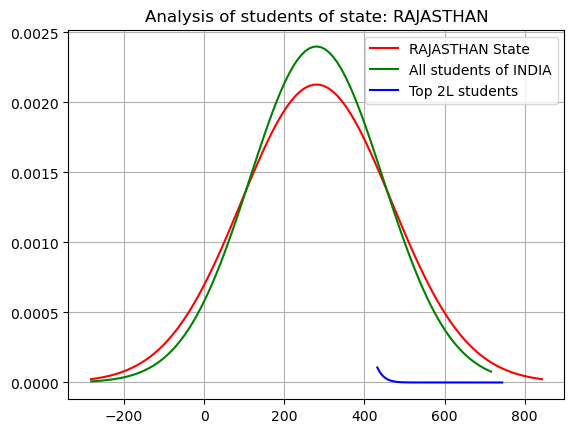

In [63]:
AnalyzeSTATE("RAJASTHAN")

Average Marks in State MAHARASHTRA is 202.28
Maximum Marks in State MAHARASHTRA is 720
Minimum Marks in State MAHARASHTRA is -170


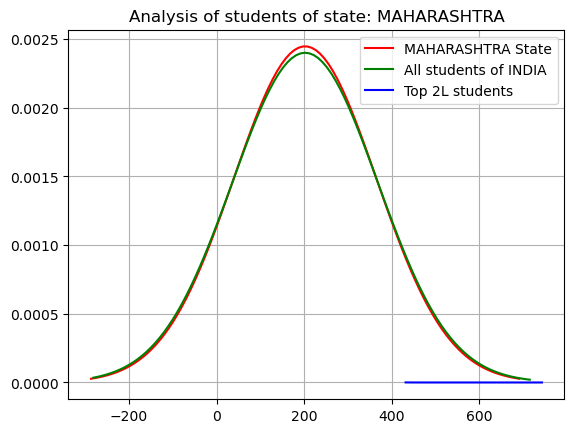

In [64]:
AnalyzeSTATE("MAHARASHTRA")

<font size = 5.5> **City wise Analysis**

In [35]:
avg_all_INDIA = np.average(DF_copy['marks'])
var_all_INDIA = np.var(DF_copy['marks'])

top_2L = sorted(DF_copy['marks'], reverse=True)[0:200000]

avg_2L = np.average(top_2L)
var_2L = np.var(top_2L)

In [58]:
def AnalyzeCITY(city):
    city_df = DF_copy[DF_copy['city'] == city]
    
    # Average
    avg = np.average(city_df['marks'])
    var = np.var(city_df['marks'])
    print('Average Marks in CITY {} is {}'.format(city, round(avg, 2)))
    
    # Maximum
    maxi = max(city_df['marks'])
    print('Maximum Marks in CITY {} is {}'.format(city, maxi))
    
    # Minimum
    mini = min(city_df['marks'])
    print('Minimum Marks in CITY {} is {}'.format(city, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} City'.format(city))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of INDIA')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of students of city: {}'.format(city))
    plt.grid(True)
    plt.show()


In [37]:
DF_copy.city.sample(10)

417747                 RAJKOT
1363645           BHUBANESWAR
1446732                 DAUSA
1241859                SANGLI
162507                  SIWAN
826119     THIRUVANANTHAPURAM
438299               VADODARA
1548607                JAIPUR
129493                NALANDA
1945678         MUZAFFARNAGAR
Name: city, dtype: object

Average Marks in CITY JAIPUR is 276.6
Maximum Marks in CITY JAIPUR is 720
Minimum Marks in CITY JAIPUR is -135


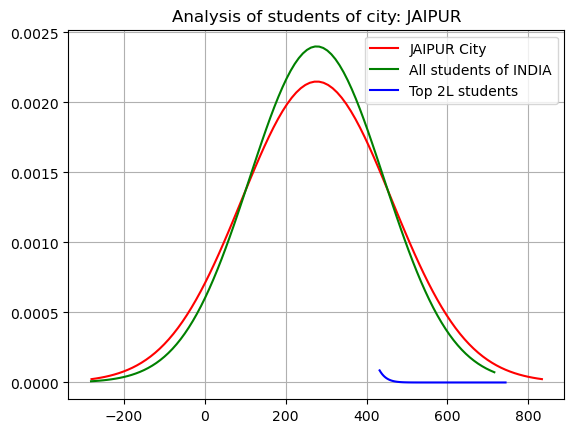

In [59]:
AnalyzeCITY("JAIPUR")

Average Marks in CITY SIKAR is 362.08
Maximum Marks in CITY SIKAR is 720
Minimum Marks in CITY SIKAR is -53


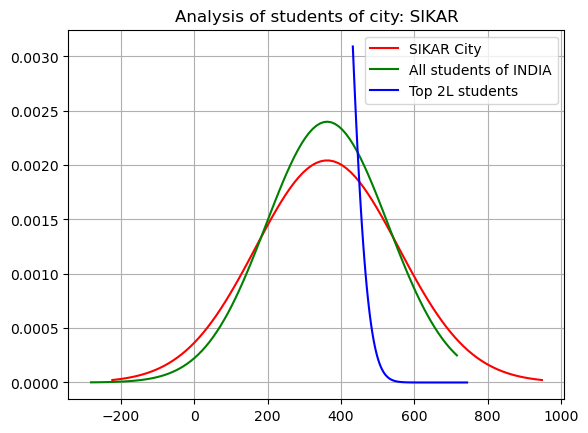

In [60]:
AnalyzeCITY("SIKAR")

Average Marks in CITY VIJAYAWADA is 343.56
Maximum Marks in CITY VIJAYAWADA is 720
Minimum Marks in CITY VIJAYAWADA is -29


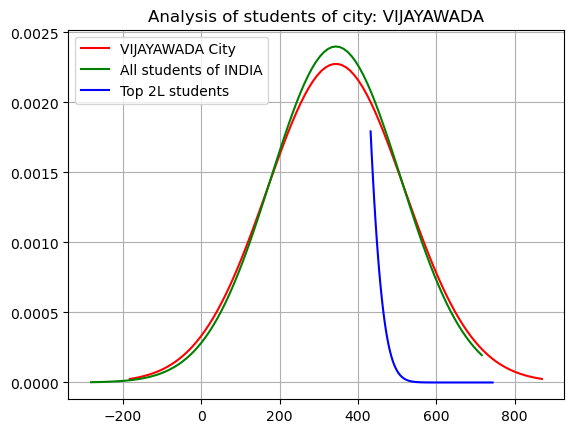

In [61]:
AnalyzeCITY("VIJAYAWADA")

<font size = 5.5> **Center Number wise Analysis**

In [56]:
def AnalyzeCenter(center_number):
    center_df = DF_copy[DF_copy['center_number'] == center_number]
    # Average
    avg = np.average(center_df['marks'])
    var = np.var(center_df['marks'])
    print('Average Marks in Center {} is {}'.format(center_number, round(avg, 2)))
    
    # Maximum
    maxi = max(center_df['marks'])
    print('Maximum Marks in Center {} is {}'.format(center_number, maxi))
    
    # Minimum
    mini = min(center_df['marks'])
    print('Minimum Marks in Center {} is {}'.format(center_number, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} center'.format(center_number))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of India')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of {} center number students'.format(center_number))
    plt.grid(True)
    plt.show()


Average Marks in Center 390332 is 289.09
Maximum Marks in Center 390332 is 701
Minimum Marks in Center 390332 is -2


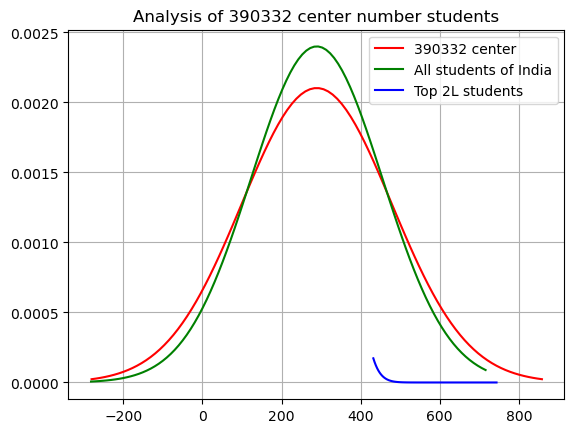

In [57]:
AnalyzeCenter(390332)

In [65]:
DF_copy.sample(10000).head()

,marks,state,city,center_name,center_number
1278259,230,MAHARASHTRA,MUMBAI,CHILDREN WELFARE CENTRE(CWC) SSC,311012
645670,119,KARNATAKA,TUMAKURU,SHRIDEVI INSTITUTE OF ENGINEERING AND TECHNOLO...,272901
1423379,151,PUNJAB,PATHANKOT,MONTESSORI CAMBRIDGE SCHOOL,381201
1219254,172,MAHARASHTRA,PUNE,DATTAKALA SHIKSHAN SANSTHA,311502
320849,259,DELHI,DELHI/NEW DELHI,KENDRIYA VIDYALAYA PITAMPURA,200137


Average Marks in Center 311011 is 225.72
Maximum Marks in Center 311011 is 720
Minimum Marks in Center 311011 is 6


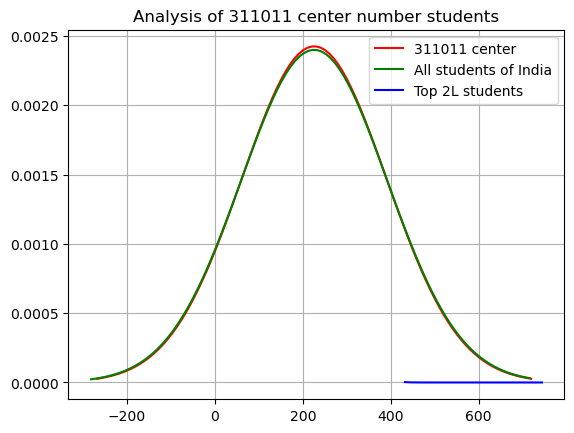

In [67]:
AnalyzeCenter(311011)

Average Marks in Center 390302 is 266.62
Maximum Marks in Center 390302 is 720
Minimum Marks in Center 390302 is -14


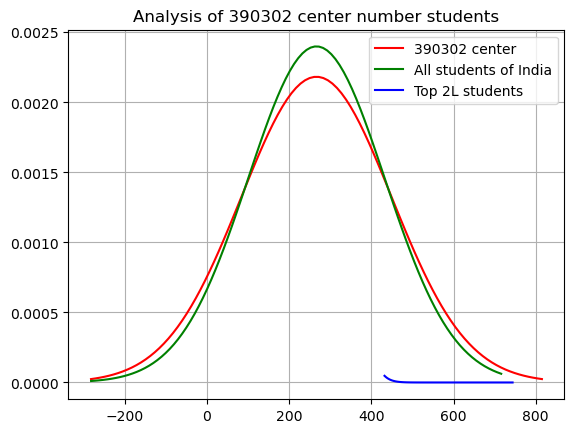

In [68]:
AnalyzeCenter(390302)

<font size = 5.5> **State wise Clustering**

Enter the state: DAMAN AND DIU (UT)


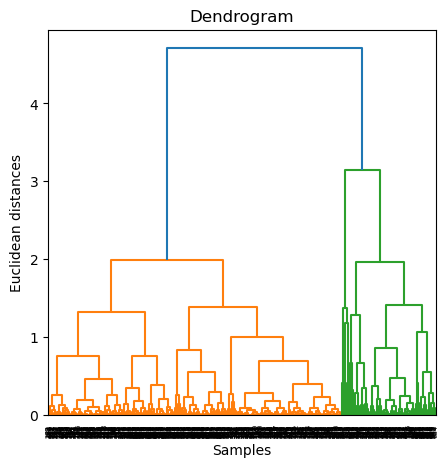

e:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\user\AppData\Local\Temp\ipykernel_11904\2064086936.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



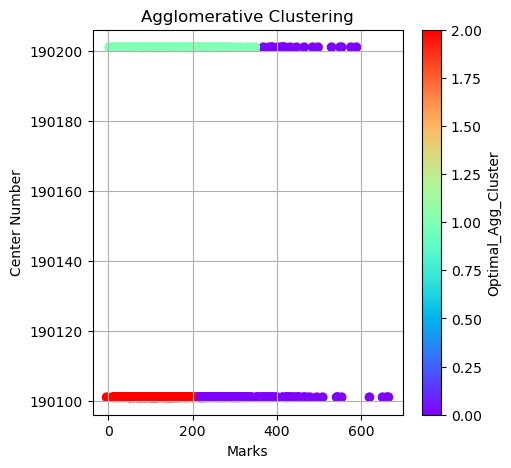

In [51]:
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Step 1: Apply robust scaling to the data
scaler = RobustScaler()

# Step 2: Extract a subset of the DataFrame for a particular state
state = input("Enter the state: ")
DF_state = DF_copy[DF_copy['state'] == state]

# Focus on the columns "marks" and "center_number"
DF_state_scaled = scaler.fit_transform(DF_state[['marks', 'center_number']])

# Step 3: Visualize the dendrogram
plt.figure(figsize=(5,5))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_state_scaled, method='complete'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 4: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_state['cluster'] = cluster.fit_predict(DF_state_scaled)

# Step 5: Plot the resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(DF_state['marks'], DF_state['center_number'], c=DF_state['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()


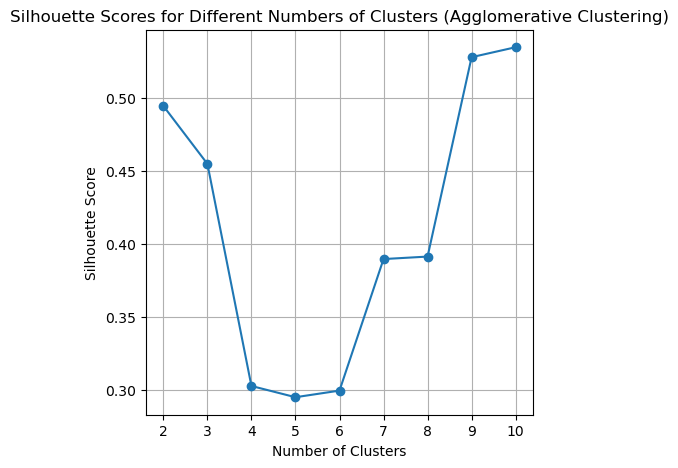

The optimal number of clusters are 10


In [54]:
# Compute silhouette scores for a range of cluster numbers
from sklearn.metrics import silhouette_score
silhouette_scores = []
range_n_clusters = range(2, 11)  # Testing from 2 to 10 clusters

for n_clusters in range_n_clusters:
    agg_cluster_test = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', 
                                               linkage='complete')
    cluster_labels = agg_cluster_test.fit_predict(DF_state_scaled)
    silhouette_avg = silhouette_score(DF_state_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(5,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Identify the number of clusters with the highest silhouette score
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters are {optimal_clusters}")


Enter the center_number: 390332


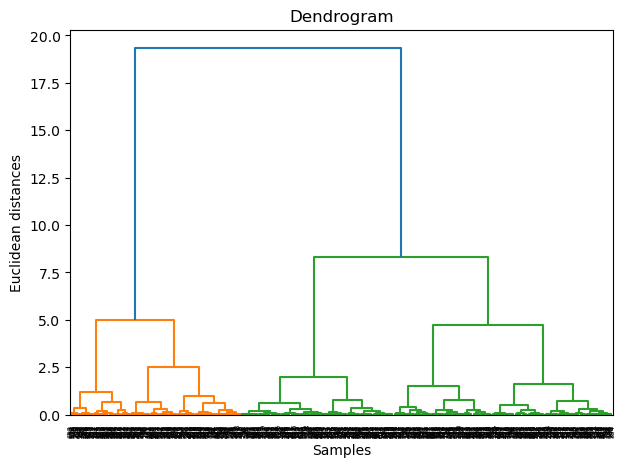

e:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\user\AppData\Local\Temp\ipykernel_11904\4107519323.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



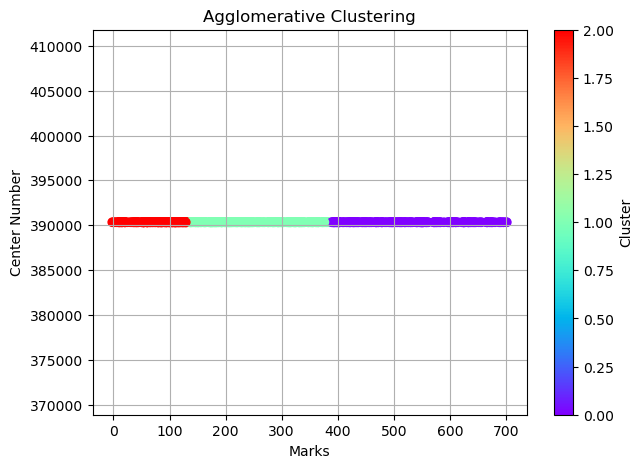

In [55]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Apply robust scaling to the data
scaler = RobustScaler()

# Step 2: Extract a subset of the DataFrame for a particular center
center_number = int(input("Enter the center_number: "))
DF_center = DF_copy[DF_copy['center_number'] == center_number]

# Check if the DataFrame is empty or too small
if DF_center.shape[0] < 2:
    raise ValueError("The filtered DataFrame is empty or too small for clustering. Please choose a different center_number.")

# Focus on the column "marks" for clustering
DF_center_scaled = scaler.fit_transform(DF_center[['marks']])

# Step 3: Visualize the dendrogram
plt.figure(figsize=(7, 5))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_center_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 4: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_center['cluster'] = cluster.fit_predict(DF_center_scaled)

# Step 5: Plot the resulting clusters
plt.figure(figsize=(7, 5))
plt.scatter(DF_center['marks'], DF_center['center_number'], 
            c=DF_center['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [50]:
# Step 2: Extract a subset of the DataFrame for a particular Center
Center = input("Enter the center_number: ")
DF_Center = DF_copy[DF_copy['center_number'] == Center]

# Focus on the columns "marks" and "center_number"
DF_Center_scaled = scaler.fit_transform(DF_Center[['marks', 'center_number']])


# Step 3: Visualize the dendrogram
plt.figure(figsize=(5,5))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_Center_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 4: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_Center['cluster'] = cluster.fit_predict(DF_Center_scaled)

# Step 5: Plot the resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(DF_Center['marks'], DF_Center['center_number'], 
            c=DF_Center['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()


Enter the center_number: 390332


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by RobustScaler.

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Apply robust scaling to the data
scaler = RobustScaler()

# Step 2: Extract a subset of the DataFrame for a particular state
state = input("Enter the state: ")
DF_state = DF_copy[DF_copy['state'] == state]

# Ensure that there are enough data points before sampling
if len(DF_state) < 100000:
    sample_fraction = 1.0
else:
    sample_fraction = 0.01

# Take a sample of the total values
DF_state_sampled = DF_state.sample(frac=sample_fraction, random_state=1)

# Check if the sampled DataFrame is empty
if DF_state_sampled.empty:
    raise ValueError("Sampled DataFrame is empty. Increase the sample fraction or check your data.")

# Focus on the columns "marks" and "center_number"
DF_state_scaled = scaler.fit_transform(DF_state_sampled[['marks', 'center_number']])

# Step 3: Visualize the dendrogram
plt.figure(figsize=(5, 5))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_state_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 4: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_state_sampled['cluster'] = cluster.fit_predict(DF_state_scaled)

# Step 5: Plot the resulting clusters
plt.figure(figsize=(5, 5))
plt.scatter(DF_state_sampled['marks'], DF_state_sampled['center_number'], c=DF_state_sampled['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Apply robust scaling to the data
scaler = RobustScaler()

# Step 2: Extract a subset of the DataFrame for a particular state
state = input("Enter the state: ")
DF_state = DF_copy[DF_copy['state'] == state]

# Take a 1% sample of the total values
sample_fraction = 0.01
DF_state_sampled = DF_state.sample(frac=sample_fraction)

# Focus on the columns "marks" and "center_number"
DF_state_scaled = scaler.fit_transform(DF_state_sampled[['marks', 'center_number']])

# Step 3: Visualize the dendrogram
plt.figure(figsize=(5, 5))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_state_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 4: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_state_sampled['cluster'] = cluster.fit_predict(DF_state_scaled)

# Step 5: Plot the resulting clusters
plt.figure(figsize=(5, 5))
plt.scatter(DF_state_sampled['marks'], DF_state_sampled['center_number'], c=DF_state_sampled['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()


https://chatgpt.com/c/894aff51-e626-4d3e-a759-7490a31d6c1a -- Sheena

https://chatgpt.com/c/403ff745-db14-404b-ae1e-746eb134e368 --

https://chatgpt.com/c/403ff745-db14-404b-ae1e-746eb134e368



https://chatgpt.com/c/403ff745-db14-404b-ae1e-746eb134e368  -- AJ